Antes de poder iniciar llamamos a las librerias que utilizaremos. En esta ocasion usaremos la libreria seaborn que nos ayudara a podeer estilizar algunas de nuestra graficas.

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1,rc={"lines.linewidth":2,'font.family': [u'times']})

Para empezar el analisis es necesario llamar los datos del CSV con la funcion pd.read_csv llamando al archivo "Child smokers.csv

In [105]:
data = pd.read_csv('Child smokers.csv')
data

,Age (years),Height (cm),FEV (litres),Sex,Smoker
0,9,145,1.708,female,non
1,8,171,1.724,female,non
2,7,138,1.720,female,non
3,9,135,1.558,male,non
4,9,145,1.895,male,non
...,...,...,...,...,...
649,15,152,2.278,female,smoker
650,16,183,4.872,male,smoker
651,16,170,4.270,male,smoker
652,15,173,3.727,male,smoker


Se utilizo varios metodos para poder hacer un estudio preliminar para ver si iba a ser necesario cambiar los datos de alguna manera.

Se utilizo la funcion .describe() para poder ver calculos rapidos sobre el numero de datos por columna, le media, mediana y la desviacion, al igual que el valor maximo y minimo.

Se puede ver que los datos estan completos y no existe errores entre si. Vemos que la altura es la variable con mas desviacion por lo cual es la que mas variaciones ha de tener.

In [106]:
data.describe()

,Age (years),Height (cm),FEV (litres)
count,654.000000,654.000000,654.000000
mean,9.931193,155.298165,2.636780
std,2.953935,14.471647,0.867059
min,3.000000,117.000000,0.791000
25%,8.000000,145.000000,1.981000
50%,10.000000,156.000000,2.547500
75%,12.000000,166.000000,3.118500
max,19.000000,188.000000,5.793000


Una funcion sencilla para poder identificar todos los grupos de la base de datos.

In [118]:
data.columns

Index(['Age (years)', 'Height (cm)', 'FEV (litres)', 'Sex', 'Smoker'], dtype='object')

Otra funcion sencilla que nos permite identificar que los tipos de la informacion que maneja cada columna.
Se puede identificar que la columna Sex y Smoker tienen valores de object, asi que podra ser necesario tener que modificar su tipo.

In [119]:
data.dtypes

Age (years)       int64
Height (cm)       int64
FEV (litres)    float64
Sex              object
Smoker           object
dtype: object

Se utilizo las funciones .min() y .max() para poder identificar el rango de los valores numericos que servira al momento de graficar.

In [121]:
print("El rango de Age es de",data['Age (years)'].min()," a",data['Age (years)'].max())
print("El rango de Height es de",data['Height (cm)'].min()," a",data['Height (cm)'].max())
print("El rango de FEV es de",data['FEV (litres)'].min()," a",data['FEV (litres)'].max())

El rango de Age es de 3  a 19
El rango de Height es de 117  a 188
El rango de FEV es de 0.7909999999999999  a 5.792999999999999


Para poder modificar los datos no numericos en nuestra tabla fue necesario utilizar las funciones .astype('category').cat.codes que convirtio los valores de 'objeto' a 'category'. 

Se creo un nuevo data frame llamado data2 para con las columnas modificadas.

In [122]:
data['Sex'] = data['Sex'].astype('category').cat.codes
data['Smoker'] = data['Smoker'].astype('category').cat.codes

data2 = pd.DataFrame(data)
data2

,Age (years),Height (cm),FEV (litres),Sex,Smoker
0,9,145,1.708,0,0
1,8,171,1.724,0,0
2,7,138,1.720,0,0
3,9,135,1.558,1,0
4,9,145,1.895,1,0
...,...,...,...,...,...
649,15,152,2.278,0,1
650,16,183,4.872,1,1
651,16,170,4.270,1,1
652,15,173,3.727,1,1


Empezamos la graficacion con graficas hitograficas. Para empezar el proceso es necesario llamar la libreria collections e importar la funcion Counter. Se guardo los datos de la columna que quieres graficar en la variable valores y esta se pasa por la funcion counter. Se indica los parametros de las barras de los datos, de la distribucion de la informacion y de las etiquetas. Por ultimo un plt.show() para mostrar graficar.

En la primera grafica podemos ver que la mayoria de la informacion es de niños de entre 7 y 13 años.

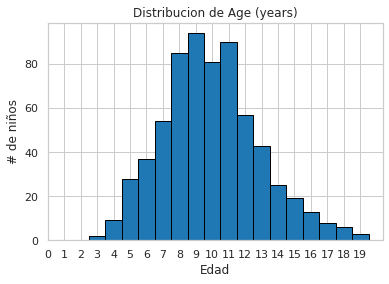

In [123]:
from collections import Counter
valores = data2["Age (years)"]
histogram = Counter(min(valor//1*1,20)for valor in valores)
plt.bar([x for x in histogram.keys()],histogram.values(),1,edgecolor = (0,0,0))
plt.xticks([i for i in range(20)])
plt.xlabel("Edad")
plt.ylabel("# de niños")
plt.title("Distribucion de Age (years)")
plt.show()

En la grafica de FEV tenemos menos variables asi que podemos ver que la mayoria de los niños tienen una FEV de approximadamente 2 litros por segundo.

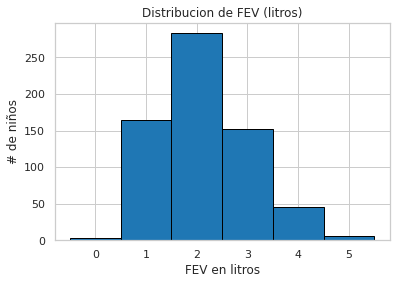

In [126]:
valores = data["FEV (litres)"]
histogram = Counter(min(valor//1*1,6)for valor in valores)
plt.bar([x for x in histogram.keys()],histogram.values(),1,edgecolor = (0,0,0))
plt.xticks([i for i in range(6)])
plt.xlabel("FEV en litros")
plt.ylabel("# de niños")
plt.title("Distribucion de FEV (litros)")
plt.show()

En la grafica de altura se nota que hay pocas personas altas y pocas personas muy pequeñas la mayoria de las personas rondan entre 160 cm.

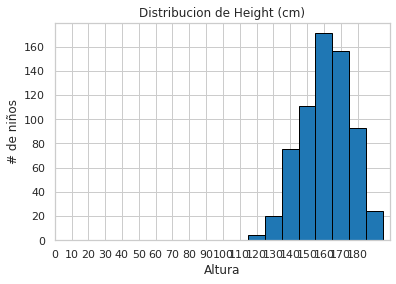

In [125]:
valores = data2["Height (cm)"]
histogram = Counter(min(valor//10*10,190)for valor in valores)
plt.bar([x+10 for x in histogram.keys()],histogram.values(),10,edgecolor = (0,0,0))
plt.xticks([i*10 for i in range(19)])
plt.xlabel("Altura")
plt.ylabel("# de niños")
plt.title("Distribucion de Height (cm)")
plt.show()

Las ultimas graficas son mas sencillas de interpretar. La de tabla de Sex solo tiene dos variables 1 siendo hombrers y 0 mujeres. Se puede ver que la cantidad de hombres es mayor que mujeres por muy poco.

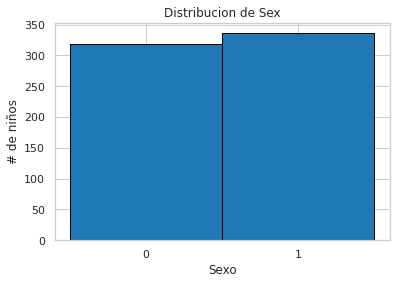

In [127]:
valores = data2["Sex"]
histogram = Counter(min(valor//1*1,2)for valor in valores)
plt.bar([x for x in histogram.keys()],histogram.values(),1,edgecolor = (0,0,0))
plt.xticks([i for i in range(2)])
plt.xlabel("Sexo")
plt.ylabel("# de niños")
plt.title("Distribucion de Sex")
plt.show()

La tabla de Smoker tambien solo tiene 2 variables. 0 siendo no fumadores y 1 siendo gente que si fuma. Existen bien pocas personas que fuman en la base de datos.

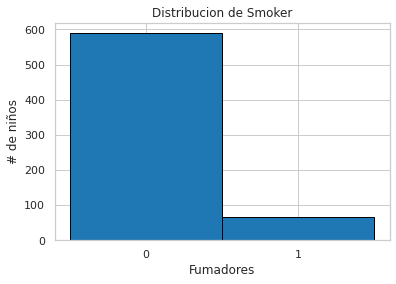

In [114]:
valores = data2["Smoker"]
histogram = Counter(min(valor//1*1,2)for valor in valores)
plt.bar([x for x in histogram.keys()],histogram.values(),1,edgecolor = (0,0,0))
plt.xticks([i for i in range(2)])
plt.xlabel("Fumadores")
plt.ylabel("# de niños")
plt.title("Distribucion de Smoker")
plt.show()

Antes de empezar la graficacion del mapa de calor y los boxplots va ser necesario normalizar los datos. Este proceso convierte el maximo de un rango de valores a 1 y su minimo a 0 y todos los numeros de entre medio un valor relativo a su posicion entre ese esos numeros.

Para esto es necesario llamar a la biblioteca sklearn.preprocessing e importar la funcion MinMaxScaler. Se pasa la funcion en los valores de la tabla y se convierten en un nuevo data frame llamado dataf.

In [115]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
data1 = data2
data3 = min_max.fit_transform(data1.values)
dataf = pd.DataFrame(data3, columns=data1.columns)
dataf

,Age (years),Height (cm),FEV (litres),Sex,Smoker
0,0.3750,0.394366,0.183327,0.0,0.0
1,0.3125,0.760563,0.186525,0.0,0.0
2,0.2500,0.295775,0.185726,0.0,0.0
3,0.3750,0.253521,0.153339,1.0,0.0
4,0.3750,0.394366,0.220712,1.0,0.0
...,...,...,...,...,...
649,0.7500,0.492958,0.297281,0.0,1.0
650,0.8125,0.929577,0.815874,1.0,1.0
651,0.8125,0.746479,0.695522,1.0,1.0
652,0.7500,0.788732,0.586965,1.0,1.0


Para crear el heat map es necesario crear una matriz con los valores nuevos del paso pasado. Se crea con la funcion .corr(). Despues de crear el matrix de correlacion se pasa por la funcion .heatmap y nos forma nuestro mapa de calor.

Se puede intepretar por el mapa de calor que los pares que tienen mas correlacion positiva son:
- Height y Age
- FEV y Height
- FEV y Age

Los pares que llegan a tener correlacion negativa es:
- Sex y Smoker

Esto nos indica en este caso que los menos mujeres fuman a comparacion con los hombres.

<AxesSubplot:>

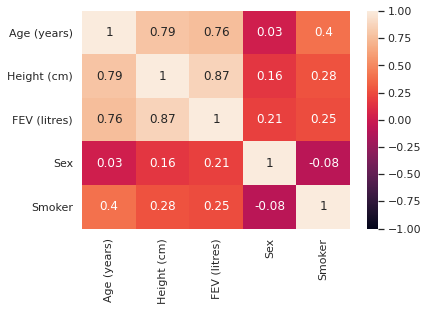

In [128]:
c_matrix = dataf.corr().round(2)
sns.heatmap(data=c_matrix, vmin = -1,annot=True)

Por ultimo se crearan las graficas Boxplot. Para esto se generan los datos que vamos utilizar en una variable llamado datos donde solo guardaremos los datos de Age, Fev y Height que usaremos en el analisis para esta forma de graficacion. Se prepara la figura con plt.figure, se declaran los ejes con fig.add_axes y se pasan los datos por la funcion boxplot. Despues se declaran las etiquetas para que se mas facil de interpretar visualmente y se muestra con la funcion plt.show.

A primera vista se puede ver que en los datos de FEV existen muchos outliners, esto puede llegar a afectar los resultados o hacerlos no del todo correctos. Los datos de Height son los unicos sin ningun outliner que afecte su informacion.

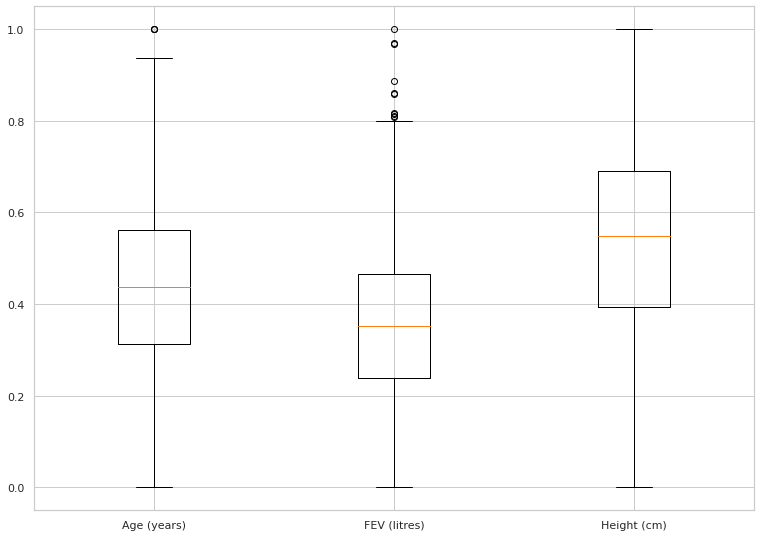

In [129]:
datos = [dataf['Age (years)'],dataf['FEV (litres)'],dataf['Height (cm)']]
fig = plt.figure(figsize=(10,7))
ax=fig.add_axes([0,0,1,1])
bp= ax.boxplot(datos)
labels = ('Age (years)','FEV (litres)','Height (cm)')
plt.xticks(np.arange(len(labels))+1,labels)
plt.show()